In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, KFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATION

In [2]:
sales_df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(f"Shape of the dataframe : {sales_df.shape}\n")
print(f"Summary of the dataframe : \n\n{sales_df.describe()}\n")
print(f"\nInformation about the dataframe : \n{sales_df.info()}\n")
print(f"\nNull values is the dataframe : \n\n{sales_df.isnull().sum()}\n")

Shape of the dataframe : (14204, 12)

Summary of the dataframe : 

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  14204.000000     14204.000000  14204.000000               14204.000000   
mean      12.793380         0.070301    141.004977                1997.830681   
std        4.651716         0.048621     62.086938                   8.371664   
min        4.555000         0.003575     31.290000                1985.000000   
25%        8.710000         0.033143     94.012000                1987.000000   
50%       12.600000         0.062347    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3

In [4]:
(len(sales_df)-len(sales_df[(sales_df.Item_Outlet_Sales.isnull()==True)]))

8523

In [5]:
sales_test = sales_df[(sales_df.Item_Outlet_Sales.isnull()==True)]
sales_df = sales_df[:int(len(sales_df)-len(sales_test))]

In [6]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
sales_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [8]:
for i in sales_df:
    if sales_df[i].dtype == 'int64' or sales_df[i].dtype == 'float64':
        if sales_df[i].isnull().sum() > 0:
            sales_df[i].fillna(sales_df[i].mean(), inplace = True)
print(sales_df[i].isnull().sum())

0


In [9]:
cat_col = list(sales_df.select_dtypes(include='object'))
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
def bar_percentage(ax,count='number of rows in data'):
    for bar in ax.patches:                                           
        percentage = f"{round((bar.get_height() /count)*100, 2)}%"
        x = bar.get_x() + bar.get_width() /2
        y = bar.get_height()
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

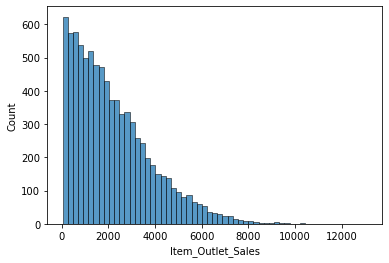

In [11]:
sb.histplot(sales_df['Item_Outlet_Sales'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

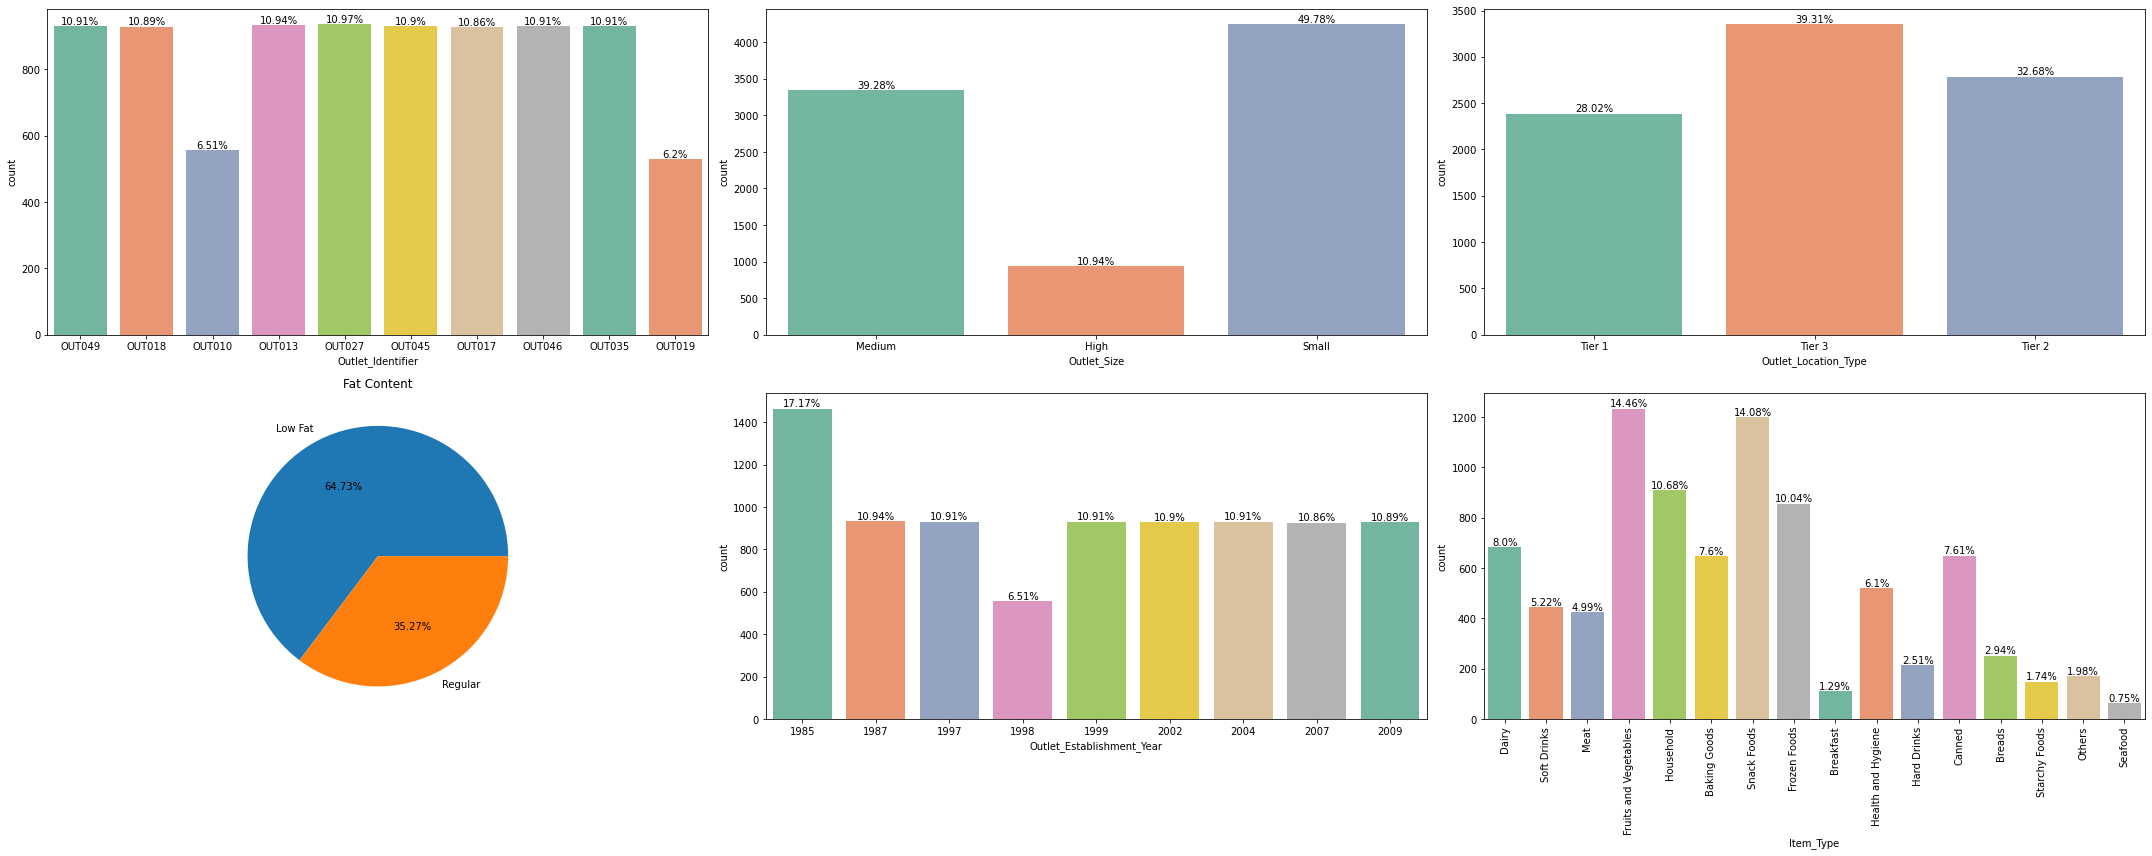

In [12]:
# Plotting the countplot for univariate analysis

fig, ax = plt.subplots(2,3, tight_layout=True ,figsize=(30,12))
bar_percentage(sb.countplot(sales_df['Outlet_Identifier'], palette='Set2', ax=ax[0][0]), len(sales_df))
bar_percentage(sb.countplot(sales_df['Outlet_Size'], palette='Set2', ax=ax[0][1]), len(sales_df))
bar_percentage(sb.countplot(sales_df['Outlet_Location_Type'], palette="Set2", ax=ax[0][2]), len(sales_df))
data = sales_df['Item_Fat_Content'].value_counts()
ax[1][0].pie(data,autopct='%.2f%%',labels=sales_df['Item_Fat_Content'].unique())
ax[1][0].set_title('Fat Content')
bar_percentage(sb.countplot(sales_df['Outlet_Establishment_Year'], palette="Set2", ax=ax[1][1]), len(sales_df))
bar_percentage(sb.countplot(sales_df['Item_Type'], palette="Set2", ax=ax[1][2]), len(sales_df))
plt.xticks(rotation=90)

**->The amount of sales from the outlet 10 and 19 are less when compared with other outlets, moreover sales in all other outlets are same.**

**->Mostly Small outlets are established.**

**->Most of the outlets are in Tier-3 Category locations.**

**->Low fat products are found to be sold more in numbers.**

**->1985 is the year where more number of establishments of the outlets have been made.**

**->Fruits, vegetables and snacks are found to be sold more on the shops.**

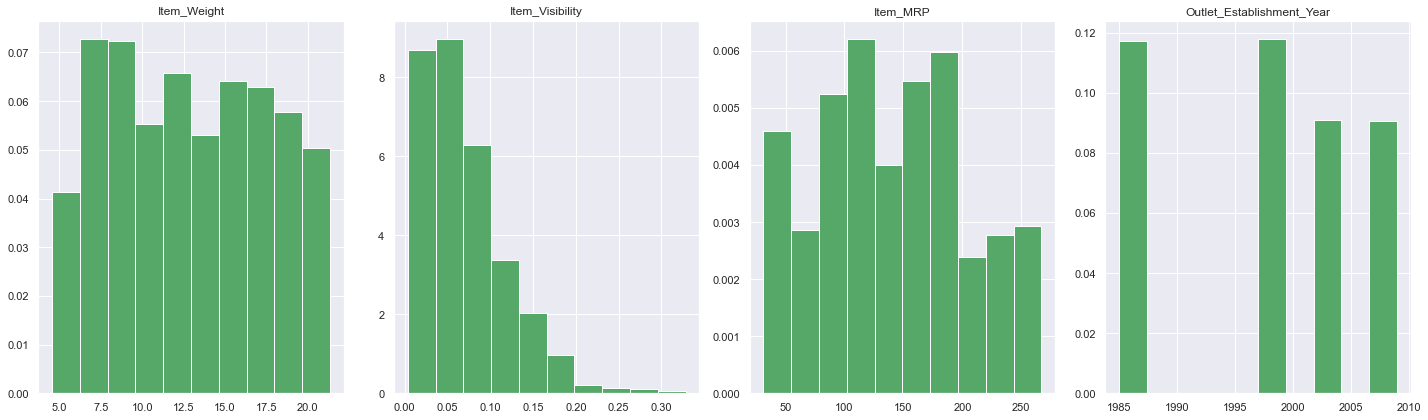

In [13]:
# For numerical Colums
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = sales_df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=4
n_bins = 10
sb.set(style="darkgrid")

# Num of Rows
num_rows= int(len(numeric_cols)/num_cols)
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,6))

# For visualizing the data usig histogram
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True,color = "g")
    ax.set_title(col)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

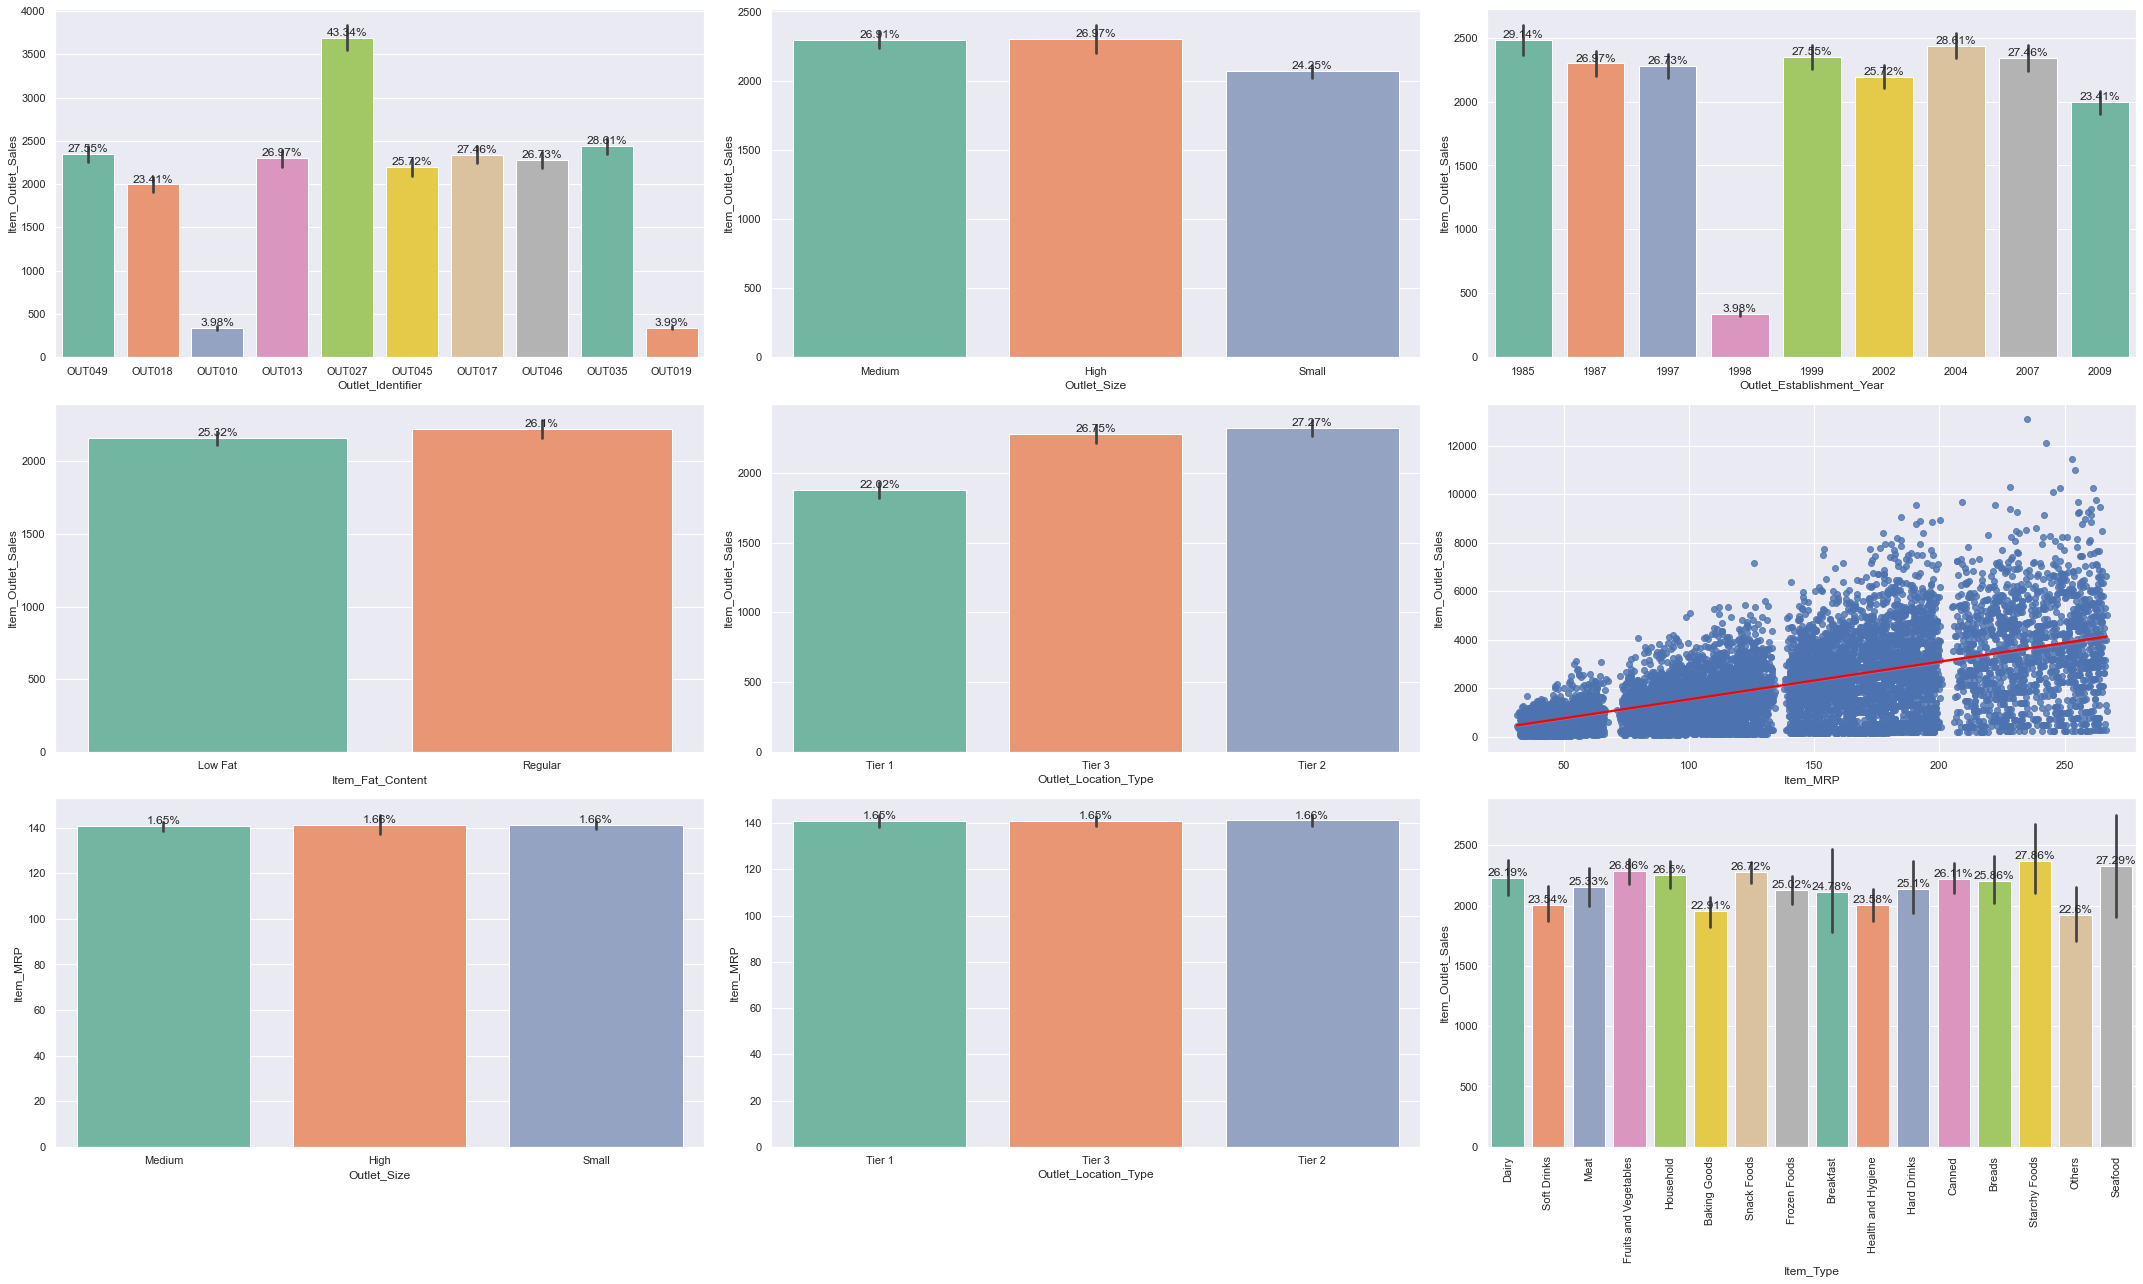

In [14]:
# Plotting the barplot for bivariate analysis

fig, ax = plt.subplots(3,3, tight_layout=True ,figsize=(30,18))
bar_percentage(sb.barplot(x=sales_df['Outlet_Identifier'], y = sales_df['Item_Outlet_Sales'],palette='Set2', ax=ax[0][0]), len(sales_df))
bar_percentage(sb.barplot(x=sales_df['Outlet_Size'], y=sales_df['Item_Outlet_Sales'],palette='Set2', ax=ax[0][1]), len(sales_df))
bar_percentage(sb.barplot(sales_df['Outlet_Establishment_Year'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[0][2]), len(sales_df))
bar_percentage(sb.barplot(sales_df['Item_Fat_Content'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[1][0]), len(sales_df))
bar_percentage(sb.barplot(sales_df['Outlet_Location_Type'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[1][1]), len(sales_df))
sb.regplot(x=sales_df['Item_MRP'],y=sales_df['Item_Outlet_Sales'],line_kws={'color':'red'},ax=ax[1][2])
bar_percentage(sb.barplot(sales_df['Outlet_Size'],y=sales_df['Item_MRP'], palette="Set2", ax=ax[2][0]), len(sales_df))
bar_percentage(sb.barplot(sales_df['Outlet_Location_Type'],y=sales_df['Item_MRP'], palette="Set2", ax=ax[2][1]), len(sales_df))
bar_percentage(sb.barplot(sales_df['Item_Type'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[2][2]), len(sales_df))
plt.xticks(rotation=90)

**More sales was done by outlet27.**

**High range outlets seems to have high sales rate**

**In the year of 1985 and 2004 sales reached its peak**

**Low fat or regular fat the products were sold more or less equally and Tier 2 locations are the place were maximum sales occured**

**Starchy foods and sea foods are the most profitly sold products**

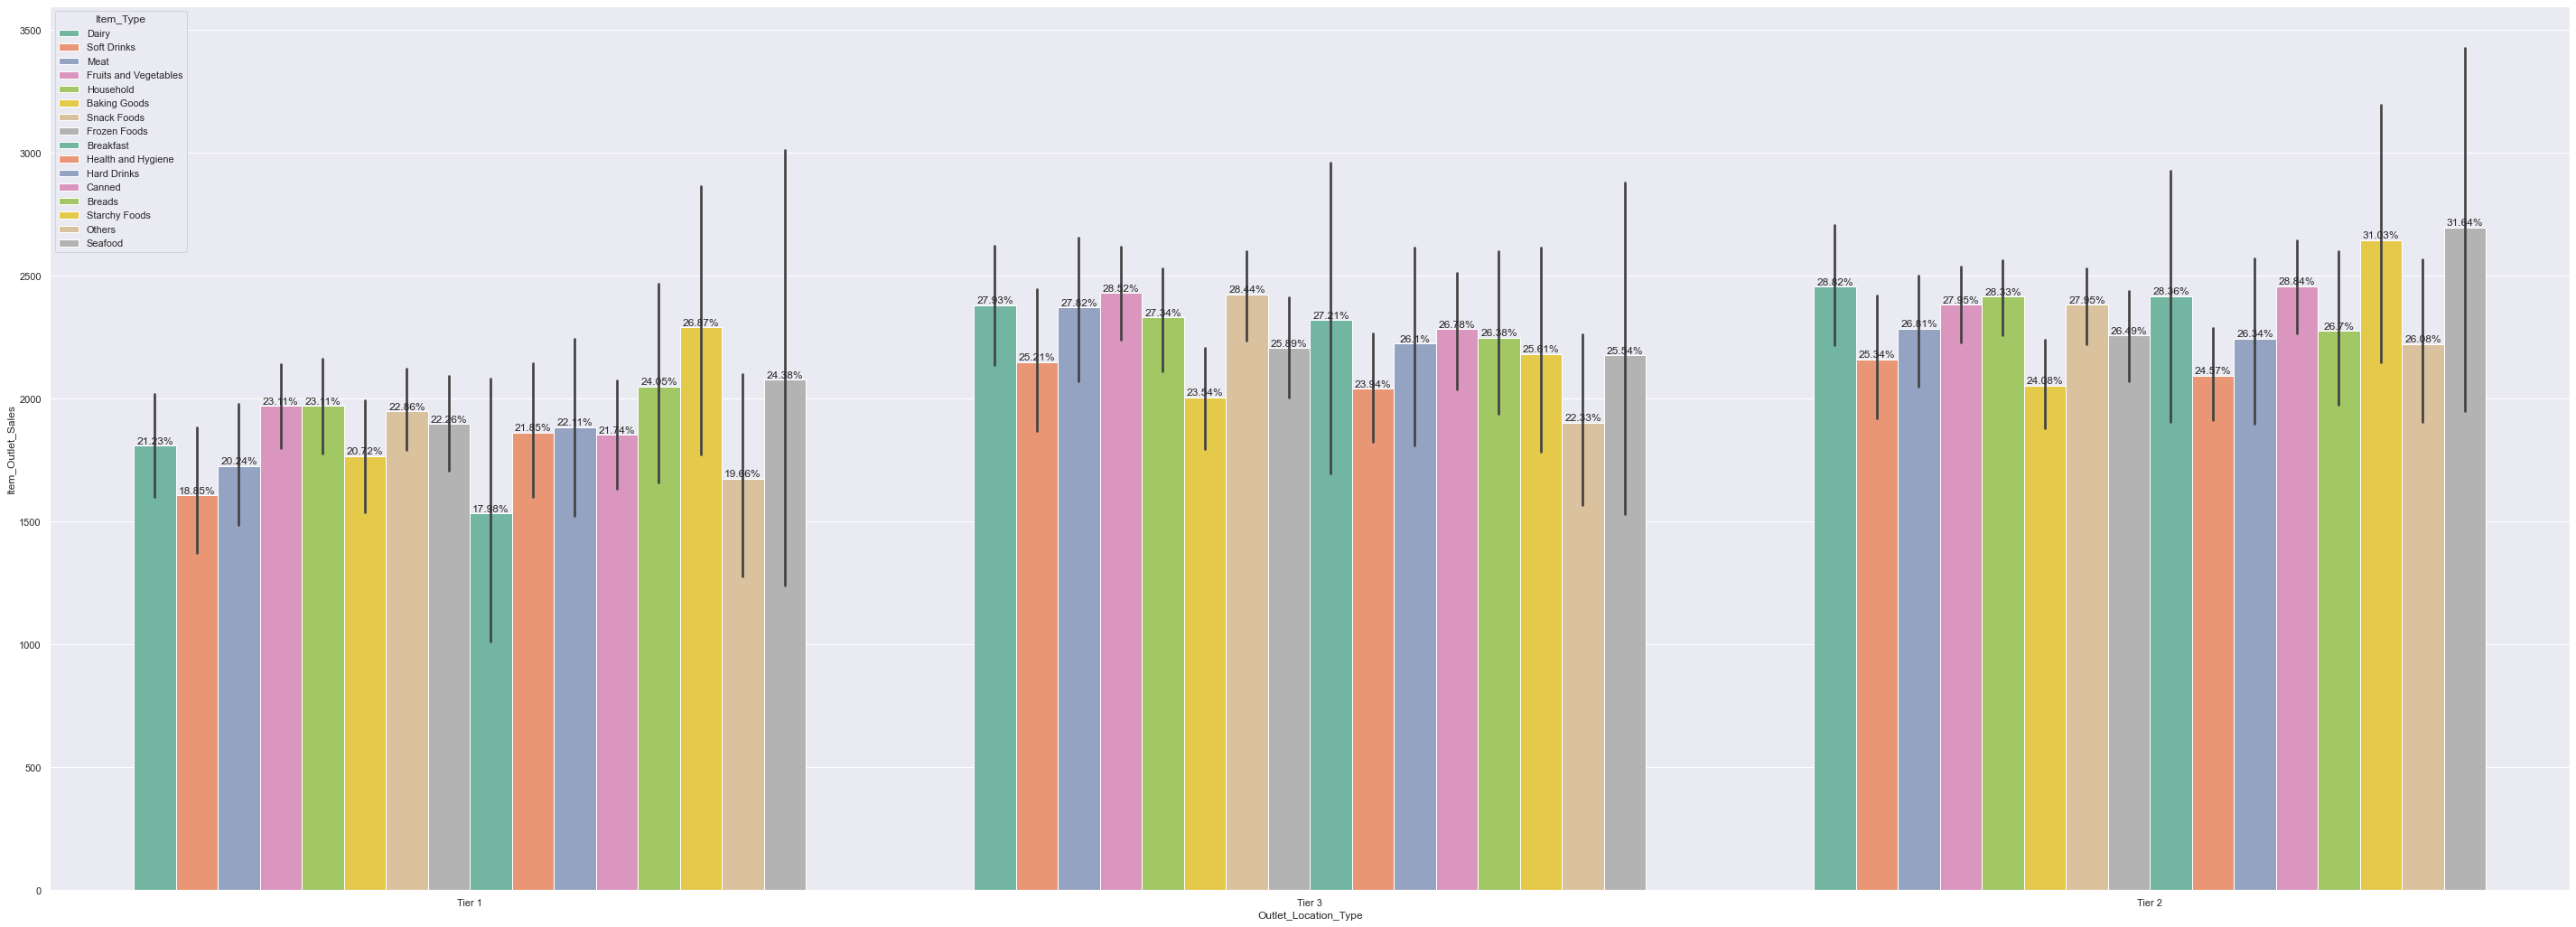

In [15]:
plt.figure(figsize=(50,18))
bar_percentage(sb.barplot(hue=sales_df['Item_Type'],x=sales_df['Outlet_Location_Type'],y=sales_df['Item_Outlet_Sales'], palette="Set2"), len(sales_df))

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

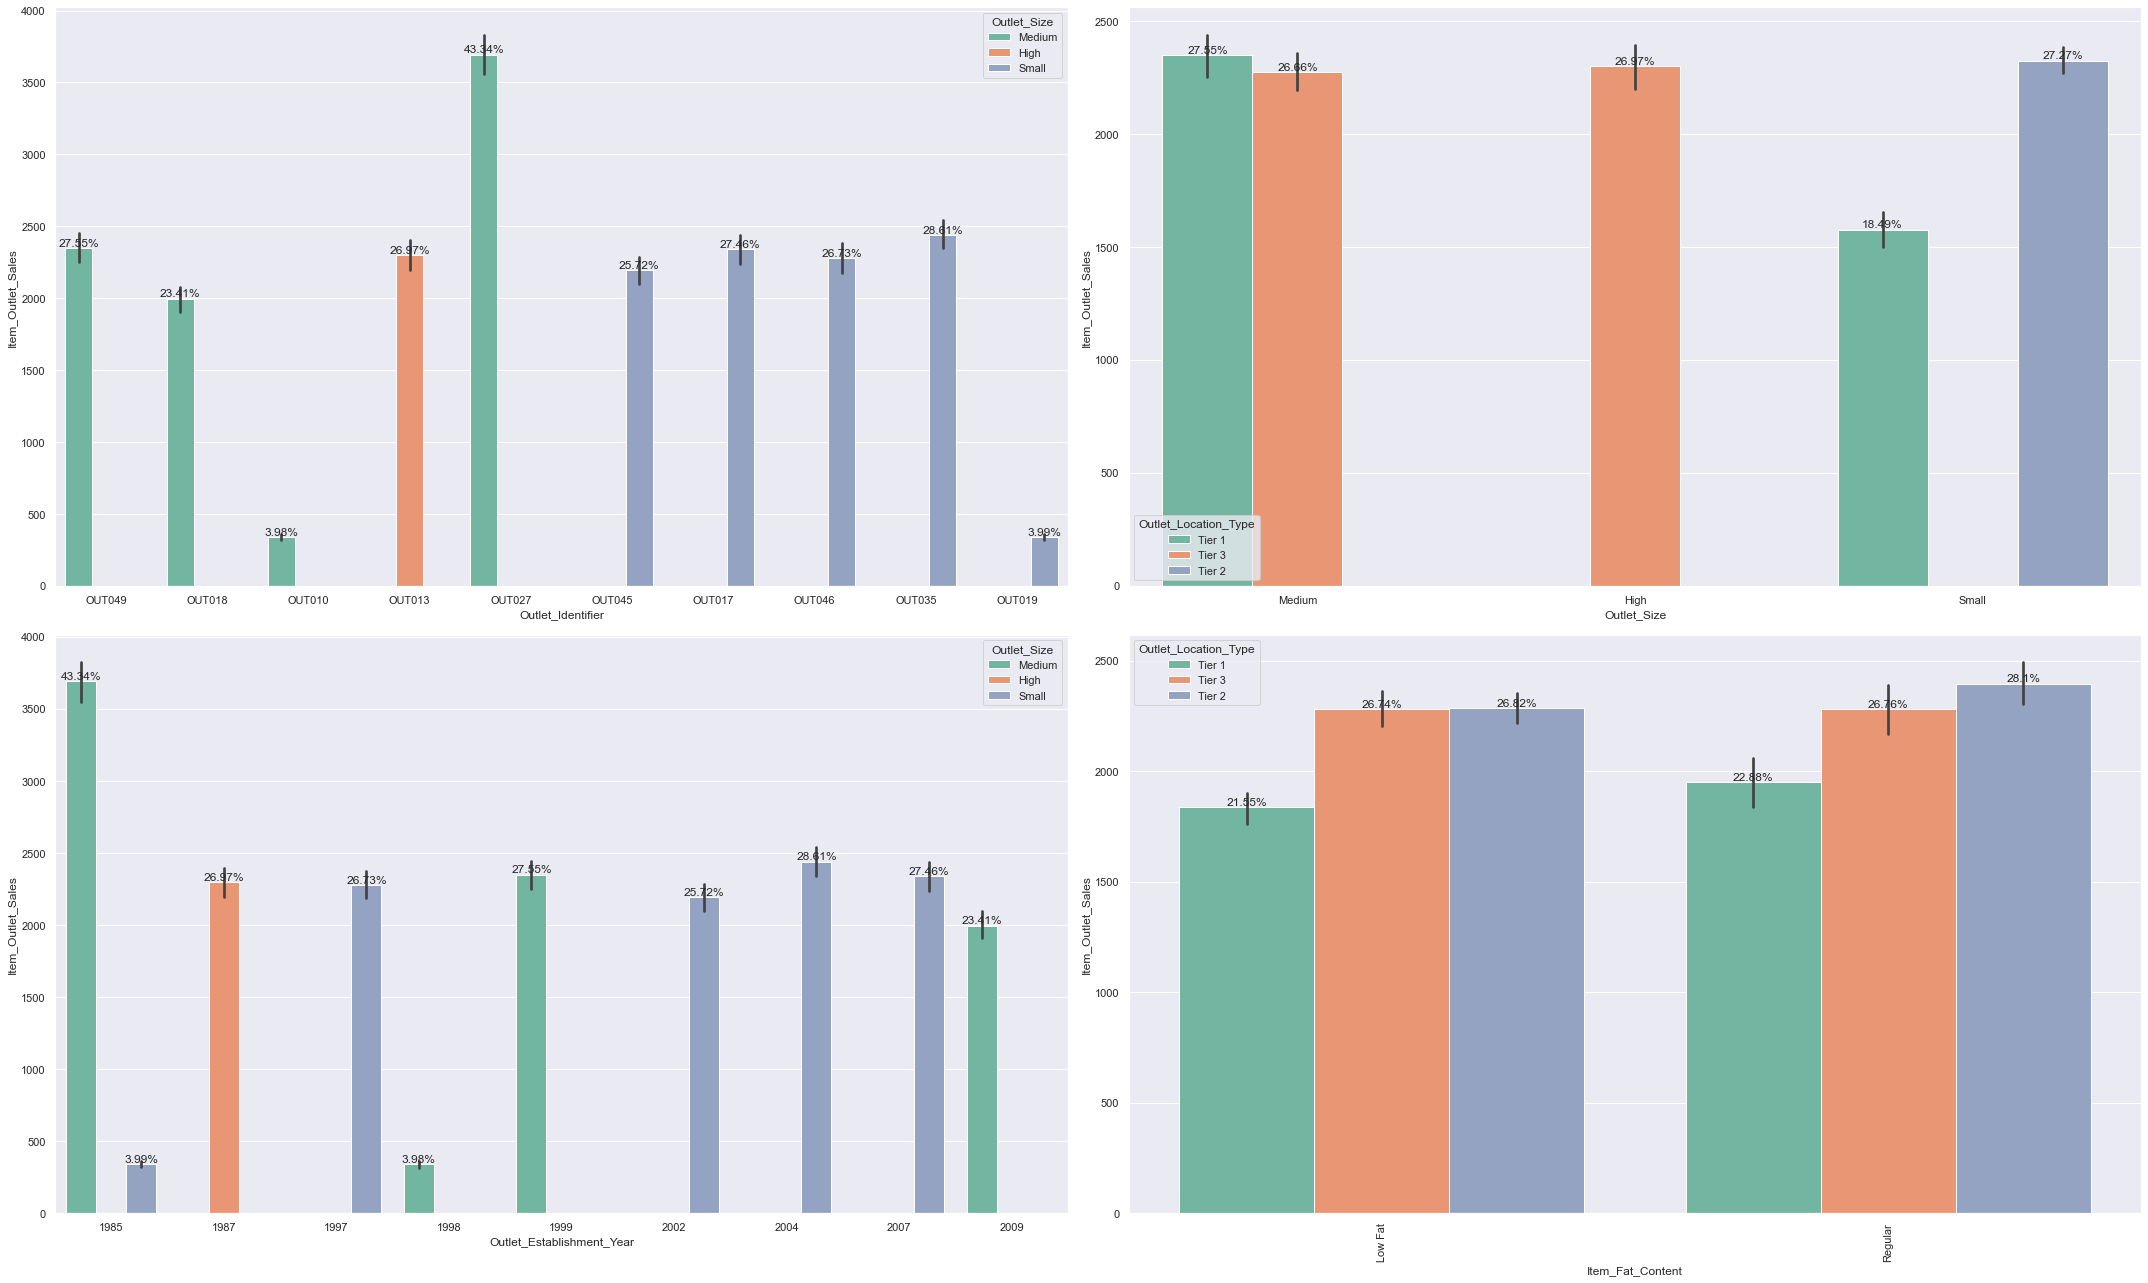

In [16]:
# Plotting the barplot for multivariate analysis

fig, ax = plt.subplots(2,2, tight_layout=True ,figsize=(30,18))
bar_percentage(sb.barplot(hue=sales_df['Outlet_Size'],x=sales_df['Outlet_Identifier'], y = sales_df['Item_Outlet_Sales'],palette='Set2', ax=ax[0][0]), len(sales_df))
bar_percentage(sb.barplot(hue=sales_df['Outlet_Location_Type'],x=sales_df['Outlet_Size'], y=sales_df['Item_Outlet_Sales'],palette='Set2', ax=ax[0][1]), len(sales_df))
bar_percentage(sb.barplot(hue=sales_df['Outlet_Size'],x=sales_df['Outlet_Establishment_Year'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[1][0]), len(sales_df))
bar_percentage(sb.barplot(hue=sales_df['Outlet_Location_Type'],x=sales_df['Item_Fat_Content'],y=sales_df['Item_Outlet_Sales'], palette="Set2", ax=ax[1][1]), len(sales_df))
plt.xticks(rotation=90)

**Mostly Small size outlets were established and Medium sized comes next to it Moreover on sales point of view Medium sized outlet27 have sold with higher sales rate.**

**Medium sized shops were formed in Tier 2 and Tier 3 areas, Small outlets are established in Tier 1 and Tier 2 areas and High sized outlets are only formed in Tier 3 areas. From the Medium sized shops which are in Tier 1 areas had a high sales rate than other two different size outlets and in Small sized shops Tier 2 areas had a high sales rate**

**Most sales rate was found to be achieved by the Medium sized shops established in the year 1985 and the sales rate reduce in the upcoming years and and after long years in 2004 the sales rate incrased for small ized shops established in that year.**

**It can be concluded that sales rate is high in Tier 2 areas and Tier 3 areas where the Low or Regular fat both products have met with a more or less equal sales rate.**

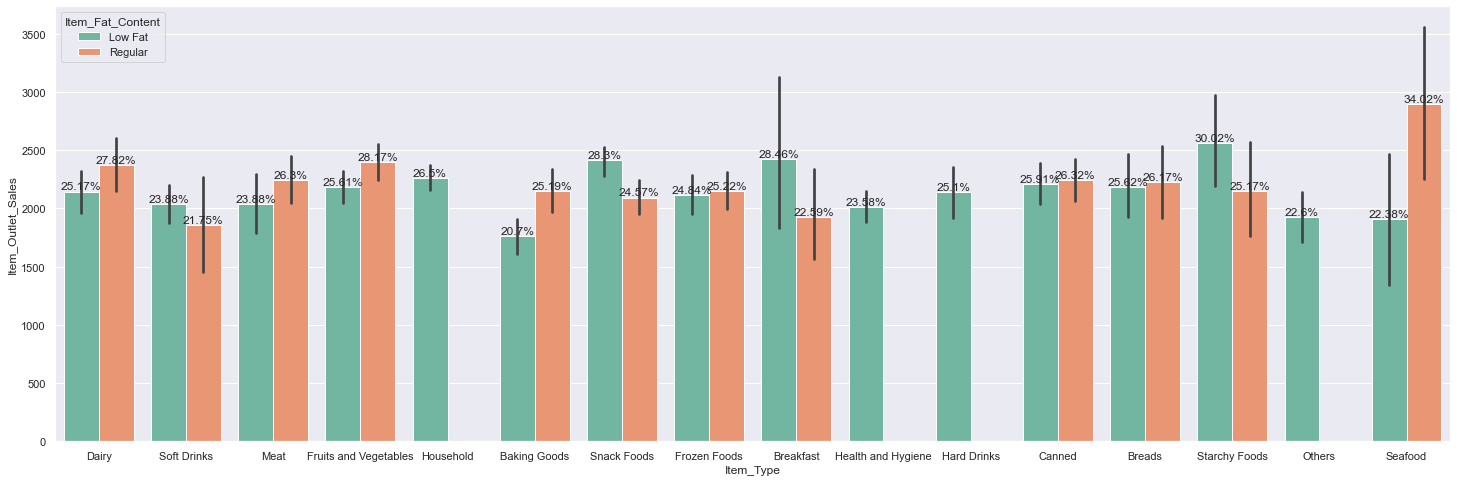

In [17]:
# Plotting the barplot for multivariate analysis

plt.figure(figsize=(25,8))
bar_percentage(sb.barplot(hue=sales_df['Item_Fat_Content'],x=sales_df['Item_Type'],y=sales_df['Item_Outlet_Sales'], palette="Set2"), len(sales_df))

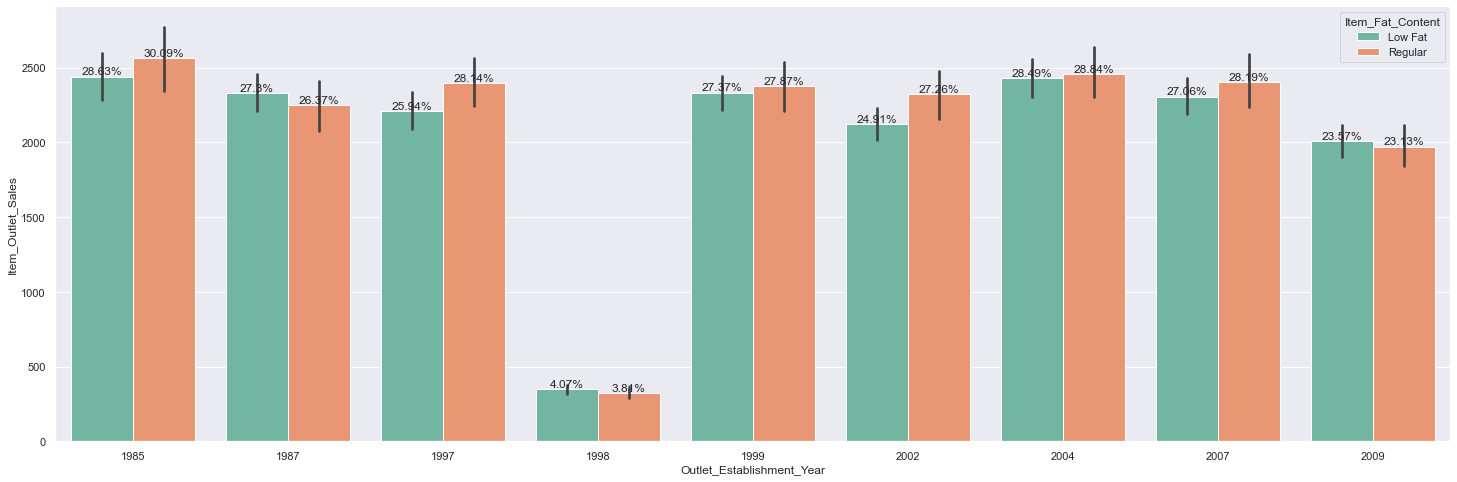

In [18]:
# Plotting the barplot for multivariate analysis

plt.figure(figsize=(25,8))
bar_percentage(sb.barplot(hue=sales_df['Item_Fat_Content'],x=sales_df['Outlet_Establishment_Year'],y=sales_df['Item_Outlet_Sales'], palette="Set2"), len(sales_df))

**Regular Fat products are ususally sold well every year and Moreover Sea foods with regular fat have been having high sales rate.**

# CONCLUSION:

Over the years the sales rate is getting reduced so unnecessary spending can be reduced to increase investments in necessary factors for boosting the sales.

1. Medium Sized Shops have good sales rate in Tier 1 areas, similarly and Tier 2 areas give good sales for Small sized shops so small shops in Tier 3 areas can be closed and its money can be utilized for other factors.

2. Soft drinks Hard drinks and Canned foods are not giving good sales rate, so instead of that those money can be utilized for breakfast seafoods which comes with low fat.

3. Even though MRP is increasing the Sales also increases but most products lie under approximately low to medium price category.

4. Tier 2 and Tier 3 areas already have highers sales for both fat and low fat products so it is clear, maximum population lies there, so tier 1 area needs less attention and small sized shops are enough in that areas.

5. Some saved money can be used in advertising the shops and available products and attractive offers can be given along with products which are sold in less amount and not so popular.

# DATA PREPROCESSING

In [19]:
# FOR TRAIN AND VALIDATION DATA

for i in sales_df:
    if sales_df[i].dtype == 'object':
        sales_df[i] = sales_df[i].astype('category')
        sales_df[i+'_encoded'] = LabelEncoder().fit_transform(sales_df[i])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Item_Identifier               8523 non-null   category
 1   Item_Weight                   8523 non-null   float64 
 2   Item_Fat_Content              8523 non-null   category
 3   Item_Visibility               8523 non-null   float64 
 4   Item_Type                     8523 non-null   category
 5   Item_MRP                      8523 non-null   float64 
 6   Outlet_Identifier             8523 non-null   category
 7   Outlet_Establishment_Year     8523 non-null   int64   
 8   Outlet_Size                   8523 non-null   category
 9   Outlet_Location_Type          8523 non-null   category
 10  Outlet_Type                   8523 non-null   category
 11  Item_Outlet_Sales             8523 non-null   float64 
 12  Item_Identifier_encoded       8523 non-null   in

In [20]:
# FOR FINAL TESTING DATA

for i in sales_test:
    if sales_test[i].dtype == 'object':
        sales_test[i] = sales_test[i].astype('category')
        sales_test[i+'_encoded'] = LabelEncoder().fit_transform(sales_test[i])
sales_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 8523 to 14203
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Item_Identifier               5681 non-null   category
 1   Item_Weight                   5681 non-null   float64 
 2   Item_Fat_Content              5681 non-null   category
 3   Item_Visibility               5681 non-null   float64 
 4   Item_Type                     5681 non-null   category
 5   Item_MRP                      5681 non-null   float64 
 6   Outlet_Identifier             5681 non-null   category
 7   Outlet_Establishment_Year     5681 non-null   int64   
 8   Outlet_Size                   5681 non-null   category
 9   Outlet_Location_Type          5681 non-null   category
 10  Outlet_Type                   5681 non-null   category
 11  Item_Outlet_Sales             0 non-null      float64 
 12  Item_Identifier_encoded       5681 non-null 

In [21]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1


CHECKING THE CORRELATION BETWEEN THE FEATURES

In [22]:
numeric = ['int64', 'int32', 'float64']
df_after_scaling = pd.DataFrame(MinMaxScaler().fit_transform(sales_df[list(sales_df.select_dtypes(include=numeric))].to_numpy()), columns = sales_df[list(sales_df.select_dtypes(include=numeric))].columns)
corr = df_after_scaling.corr().style.background_gradient(cmap='coolwarm')
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261,0.048366,-0.027166,0.035973,-0.007568,-0.013371,0.002929,0.000298
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247,-0.029442,0.049815,-0.036094,-0.105722,0.031617,-0.029109,-0.178473
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574,0.012853,0.006063,0.032651,0.003319,0.001215,0.000232,-0.001975
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135,-0.012772,0.003151,0.004970,0.079035,0.428367,-0.089216,-0.122304
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000,0.002869,0.018719,0.017048,0.162325,-0.060517,0.089367,0.401522
Item_Identifier_encoded,0.048366,-0.029442,0.012853,-0.012772,0.002869,1.000000,-0.114660,-0.017973,-0.008602,-0.002556,0.003656,-0.001178
Item_Fat_Content_encoded,-0.027166,0.049815,0.006063,0.003151,0.018719,-0.114660,1.000000,-0.139434,0.000764,-0.001369,-0.001598,0.002199
Item_Type_encoded,0.035973,-0.036094,0.032651,0.004970,0.017048,-0.017973,-0.139434,1.000000,0.001656,-0.000394,0.003084,0.003053
Outlet_Identifier_encoded,-0.007568,-0.105722,0.003319,0.079035,0.162325,-0.008602,0.000764,0.001656,1.000000,0.423653,-0.716176,0.099873
Outlet_Size_encoded,-0.013371,0.031617,0.001215,0.428367,-0.060517,-0.002556,-0.001369,-0.000394,0.423653,1.000000,-0.590686,-0.260467


NORMALIZED SCALING PERFORMED ON TEST DATASET

In [23]:
numeric1 = ['int64', 'int32', 'float64']
df_after_scaling1 = pd.DataFrame(MinMaxScaler().fit_transform(sales_test[list(sales_test.select_dtypes(include=numeric))].to_numpy()), columns = sales_test[list(sales_test.select_dtypes(include=numeric))].columns)

In [24]:
df_after_scaling

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Fat_Content_encoded,Item_Type_encoded,Outlet_Identifier_encoded,Outlet_Size_encoded,Outlet_Location_Type_encoded,Outlet_Type_encoded
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.100128,0.0,0.266667,1.000000,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,0.005135,1.0,0.933333,0.333333,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.424904,0.0,0.666667,1.000000,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,0.719512,1.0,0.400000,0.000000,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.832478,0.0,0.600000,0.111111,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.163812,0.777729,0.083333,0.210293,0.237484,0.0,0.866667,0.111111,0.0,1.0,0.333333
8519,0.227746,0.133638,0.326263,0.708333,0.039529,0.575738,1.0,0.000000,0.777778,1.0,0.5,0.333333
8520,0.359929,0.097321,0.228492,0.791667,0.088850,0.870988,0.0,0.533333,0.666667,1.0,0.5,0.333333
8521,0.158083,0.436080,0.304939,1.000000,0.138835,0.437099,1.0,0.866667,0.333333,0.5,1.0,0.666667


WITH THE HELP OF CORRELATION CHOOSING THE APPROPRIATE FEATURES FOR PREDICTION IN TRAIN DATASET

In [25]:
l1 = []

for i in df_after_scaling:
    if abs(df_after_scaling[i].corr(df_after_scaling['Item_Outlet_Sales'])) >= 0.1:
        l1.append(i)

# New dataframe created

new_scaled_df = df_after_scaling[l1]
new_scaled_df

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Identifier_encoded,Outlet_Type_encoded
0,0.038399,0.927507,0.283587,1.000000,0.333333
1,0.048346,0.072068,0.031419,0.333333,0.666667
2,0.040593,0.468288,0.158115,1.000000,0.333333
3,0.218055,0.640093,0.053555,0.000000,0.000000
4,0.186950,0.095805,0.073651,0.111111,0.333333
...,...,...,...,...,...
8518,0.163812,0.777729,0.210293,0.111111,0.333333
8519,0.133638,0.326263,0.039529,0.777778,0.333333
8520,0.097321,0.228492,0.088850,0.666667,0.333333
8521,0.436080,0.304939,0.138835,0.333333,0.666667


SCALED TEST DATA WITH APPROPRIATE FEATURES TO MAKE IT SUITABLE FOR FEEDING THE MODEL FOR PREDICTION

In [26]:
test_scaled_df = df_after_scaling1[new_scaled_df.columns]
test_scaled_df

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Identifier_encoded,Outlet_Type_encoded
0,0.012415,0.323413,NaN,1.000000,0.333333
1,0.108848,0.235849,NaN,0.222222,0.333333
2,0.299905,0.894140,NaN,0.000000,0.000000
3,0.036860,0.524488,NaN,0.222222,0.333333
4,0.359348,0.862069,NaN,0.555556,1.000000
...,...,...,...,...,...
5676,0.030949,0.466011,NaN,0.888889,0.333333
5677,0.435561,0.584637,NaN,0.333333,0.666667
5678,0.218522,0.369798,NaN,0.777778,0.333333
5679,0.190965,0.778487,NaN,0.222222,0.333333


# DATA SPLITTING INTO TRAIN, VALIDATION AND TEST DATASET

In [27]:
rows = int(0.7*(len(sales_df)))
sales_train = sales_df[:rows]
sales_val = sales_df[rows:]

In [28]:
sales_train.shape, sales_val.shape, sales_test.shape

((5966, 19), (2557, 19), (5681, 19))

In [29]:
X = new_scaled_df.loc[:,new_scaled_df.columns!='Item_Outlet_Sales']
y = new_scaled_df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [30]:
X1 = test_scaled_df.loc[:,test_scaled_df.columns!='Item_Outlet_Sales']
y1 = test_scaled_df['Item_Outlet_Sales']

# LINEAR REGRESSION MODEL

In [31]:
linear_model = LinearRegression(normalize=True).fit(X_train, y_train)
linear_validation = linear_model.predict(X_test)
linear_validation

array([0.20743063, 0.05968377, 0.19881075, ..., 0.06950462, 0.12610272,
       0.23425836])

In [32]:
parameters1 = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid4 = GridSearchCV(linear_model, parameters1, cv=10)
grid4.fit(X_train, y_train)
print(grid4.best_estimator_)

LinearRegression(normalize=True)


In [33]:
linear_r2 = linear_model.score(X_train, y_train)
print(f"R square value for Linear Regression : {linear_r2}")
linear_mse = mean_squared_error(y_test, linear_validation)
linear_mae = mean_absolute_error(y_test, linear_validation)
linear_rmse = mean_squared_error(y_test, linear_validation, squared=False)
print(f"MEAN SQUARED ERROR: {linear_mse} \nMEAN ABSOLUTE ERROR: {linear_mae} \nROOT MEAN SQUARED ERROR: {linear_rmse}")

R square value for Linear Regression : 0.49787865261782416
MEAN SQUARED ERROR: 0.008442996439888271 
MEAN ABSOLUTE ERROR: 0.06875565397272902 
ROOT MEAN SQUARED ERROR: 0.09188577931262416


In [34]:
linear_df = pd.DataFrame([y_test.values, linear_validation], index=[['Actual', 'Predicted']])
linear_df.T

,Actual,Predicted
0,0.195705,0.207431
1,0.054065,0.059684
2,0.159645,0.198811
3,0.152606,0.150581
4,0.066612,0.090700
...,...,...
2552,0.175559,0.348877
2553,0.148781,0.173765
2554,0.041212,0.069505
2555,0.180608,0.126103


PREDICTION WITH LINEAR REGRESSION TRAINED MODEL ON TEST DATASET

In [35]:
linear_predict = linear_model.predict(X1)
pd.DataFrame([test_scaled_df.Item_MRP.values, linear_predict], index=['Item_MRP',"Predicted_Sales"]).T

,Item_MRP,Predicted_Sales
0,0.323413,0.143038
1,0.235849,0.077551
2,0.894140,0.180728
3,0.524488,0.161038
4,0.862069,0.381299
...,...,...
5676,0.466011,0.176737
5677,0.584637,0.228333
5678,0.369798,0.136799
5679,0.778487,0.225445


In [36]:
names, results=[],[]
#cross validation of Linear regression

# evaluate the model
cv =RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1 = cross_val_score(linear_model,X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores1)
names.append('lr')

# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

R2-Score: 0.500 (0.020)


# DECISION TREE REGRESSION MODEL

In [37]:
decision_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20).fit(X_train, y_train)
decision_validation = decision_model.predict(X_test)
decision_validation

array([0.22444798, 0.07258596, 0.22444798, ..., 0.04757434, 0.14912693,
       0.22444798])

In [38]:
    params1 = {
        'max_depth': [1,2,3,4,5,6,7,8],
        'min_samples_leaf': [5,10,20,100]
    }
    grid2 = GridSearchCV(estimator=decision_model, param_grid=params1, cv=4, n_jobs=-1, verbose = 1, scoring='neg_mean_squared_error')
    grid2.fit(X_train, y_train)
    best2= grid2.best_estimator_
    best2

Fitting 4 folds for each of 32 candidates, totalling 128 fits


DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [39]:
decision_r2 = decision_model.score(X_train, y_train)
print(f"R square value for Decision Tree Regression : {decision_r2}")
dt_mse = mean_squared_error(y_test, decision_validation)
dt_mae = mean_absolute_error(y_test, decision_validation)
dt_rmse = mean_squared_error(y_test, decision_validation, squared=False)
print(f"MEAN SQUARED ERROR: {dt_mse} \nMEAN ABSOLUTE ERROR: {dt_mae} \nROOT MEAN SQUARED ERROR: {dt_rmse}")

R square value for Decision Tree Regression : 0.6015596657398621
MEAN SQUARED ERROR: 0.006831977990082975 
MEAN ABSOLUTE ERROR: 0.05787887640897137 
ROOT MEAN SQUARED ERROR: 0.08265578013716267


In [40]:
decision_df = pd.DataFrame([y_test.values, decision_validation], index=[['Actual', 'Predicted']])
decision_df.T

,Actual,Predicted
0,0.195705,0.224448
1,0.054065,0.072586
2,0.159645,0.224448
3,0.152606,0.189256
4,0.066612,0.072586
...,...,...
2552,0.175559,0.258863
2553,0.148781,0.075786
2554,0.041212,0.047574
2555,0.180608,0.149127


In [41]:
decision_predict = decision_model.predict(X1)
pd.DataFrame([test_scaled_df.Item_MRP.values, decision_predict], index=['Item_MRP',"Predicted_Sales"]).T

,Item_MRP,Predicted_Sales
0,0.323413,0.113760
1,0.235849,0.113760
2,0.894140,0.038110
3,0.524488,0.189256
4,0.862069,0.472086
...,...,...
5676,0.466011,0.149127
5677,0.584637,0.224448
5678,0.369798,0.149127
5679,0.778487,0.300293


In [42]:
#cross validation of Ada boost

# evaluate the model
cv2 =RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4 = cross_val_score(decision_model,X,y, scoring='r2', cv=cv2, n_jobs=-1, error_score='raise')

results.append(n_scores4)
names.append('dt')

# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

R2-Score: 0.594 (0.023)


# RANDOM FOREST REGRESSION MODEL

In [43]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [44]:
random_forest = RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=25).fit(X_train, y_train)
random_forest_validation = random_forest.predict(X_test)
random_forest_validation

array([0.22950588, 0.08381104, 0.21757447, ..., 0.04953487, 0.14669571,
       0.21164583])

In [45]:
    params = {
        'max_depth': [1,2,3,4,5,6,7,8],
        'min_samples_leaf': [5,10,20,100],
        'n_estimators': [10,25,30]
    }
    grid1 = GridSearchCV(estimator=random_forest, param_grid=params, cv=4, n_jobs=-1, verbose = 1, scoring='neg_mean_squared_error')
    grid1.fit(X_train, y_train)
    best1= grid1.best_estimator_
    best1

Fitting 4 folds for each of 96 candidates, totalling 384 fits


RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=30)

In [46]:
random_forest_r2 = random_forest.score(X_train, y_train)
print(f"R square value for Random Forest Regression : {random_forest_r2}")
rfg_mse = mean_squared_error(y_test, random_forest_validation)
rfg_mae = mean_absolute_error(y_test, random_forest_validation)
rfg_rmse = mean_squared_error(y_test, random_forest_validation, squared=False)
print(f"MEAN SQUARED ERROR: {rfg_mse} \nMEAN ABSOLUTE ERROR: {rfg_mae} \nROOT MEAN SQUARED ERROR: {rfg_rmse}")

R square value for Random Forest Regression : 0.6062543470008246
MEAN SQUARED ERROR: 0.006746938196036575 
MEAN ABSOLUTE ERROR: 0.05755990934885345 
ROOT MEAN SQUARED ERROR: 0.08213974796672179


In [47]:
random_df = pd.DataFrame([y_test.values, random_forest_validation], index=[['Actual', 'Predicted']])
random_df.T

,Actual,Predicted
0,0.195705,0.229506
1,0.054065,0.083811
2,0.159645,0.217574
3,0.152606,0.186072
4,0.066612,0.087145
...,...,...
2552,0.175559,0.292245
2553,0.148781,0.080490
2554,0.041212,0.049535
2555,0.180608,0.146696


In [48]:
random_forest_predict = random_forest.predict(X1)
pd.DataFrame([test_scaled_df.Item_MRP.values, random_forest_predict], index=['Item_MRP',"Predicted_Sales"]).T

,Item_MRP,Predicted_Sales
0,0.323413,0.121428
1,0.235849,0.104842
2,0.894140,0.038678
3,0.524488,0.186072
4,0.862069,0.481153
...,...,...
5676,0.466011,0.161402
5677,0.584637,0.205702
5678,0.369798,0.140193
5679,0.778487,0.287720


In [49]:
#cross validation of Random forest

# evaluate the model
cv1 =RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2 = cross_val_score(random_forest,X,y, scoring='r2', cv=cv1, n_jobs=-1, error_score='raise')

results.append(n_scores2)
names.append('rf')

# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

R2-Score: 0.598 (0.023)


# ADABOOST REGRESSION MODEL

In [50]:
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                       max_features='auto',
                                                       min_samples_leaf=10,
                                                       splitter='random'),
                  learning_rate=0.01).fit(X_train, y_train)
adaboost_validation = adaboost_model.predict(X_test)
adaboost_validation

array([0.2380341 , 0.0914754 , 0.21275352, ..., 0.0598743 , 0.15359135,
       0.18468274])

In [51]:
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}
grid3 = GridSearchCV(estimator=adaboost_model, param_grid=parameters, cv=4, n_jobs=-1, verbose = 1, scoring='neg_mean_squared_error')
grid3.fit(X_train, y_train)
best3= grid3.best_estimator_
best3

Fitting 4 folds for each of 80 candidates, totalling 320 fits


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                       max_features='auto',
                                                       min_samples_leaf=10,
                                                       splitter='random'),
                  learning_rate=0.01)

In [52]:
adaboost_r2 = adaboost_model.score(X_train, y_train)
print(f"R square value for Adaboost Regression : {adaboost_r2}")
ada_mse = mean_squared_error(y_test, adaboost_validation)
ada_mae = mean_absolute_error(y_test, adaboost_validation)
ada_rmse = mean_squared_error(y_test, adaboost_validation, squared=False)
print(f"MEAN SQUARED ERROR: {ada_mse} \nMEAN ABSOLUTE ERROR: {ada_mae} \nROOT MEAN SQUARED ERROR: {ada_rmse}")

R square value for Adaboost Regression : 0.6145081859332884
MEAN SQUARED ERROR: 0.006643607459552782 
MEAN ABSOLUTE ERROR: 0.05703292642130966 
ROOT MEAN SQUARED ERROR: 0.08150832754726833


In [53]:
adaboost_df = pd.DataFrame([y_test.values, adaboost_validation], index=[['Actual', 'Predicted']])
adaboost_df.T

,Actual,Predicted
0,0.195705,0.238034
1,0.054065,0.091475
2,0.159645,0.212754
3,0.152606,0.188853
4,0.066612,0.093256
...,...,...
2552,0.175559,0.261567
2553,0.148781,0.091417
2554,0.041212,0.059874
2555,0.180608,0.153591


In [54]:
adaboost_predict = adaboost_model.predict(X1)
pd.DataFrame([test_scaled_df.Item_MRP.values, adaboost_predict], index=['Item_MRP',"Predicted_Sales"]).T

,Item_MRP,Predicted_Sales
0,0.323413,0.131631
1,0.235849,0.105621
2,0.894140,0.041281
3,0.524488,0.191470
4,0.862069,0.475573
...,...,...
5676,0.466011,0.178487
5677,0.584637,0.171360
5678,0.369798,0.143437
5679,0.778487,0.281625


In [55]:
#cross validation of Ada boost

# evaluate the model
cv2 =RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3 = cross_val_score(adaboost_model,X,y, scoring='r2', cv=cv2, n_jobs=-1, error_score='raise')

results.append(n_scores3)
names.append('Abr')

# report performance
print('R2-Score: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

R2-Score: 0.603 (0.024)


# STACKING REGRESSION MODEL

In [56]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rfg', RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=25)))
    level0.append(('lr', LinearRegression(normalize=True)))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=25)
    # define the stacking ensemble
    model_s = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
    return model_s

In [57]:
stacking_model = get_stacking().fit(X_train, y_train)
stacking_validation = stacking_model.predict(X_test)
stacking_validation

array([0.244915  , 0.08952696, 0.20465824, ..., 0.04785434, 0.1531063 ,
       0.18087088])

In [58]:
stacking_r2 = stacking_model.score(X_train, y_train)
print(f"R square value for Adaboost Regression : {stacking_r2}")
stacking_mse = mean_squared_error(y_test, stacking_validation)
stacking_mae = mean_absolute_error(y_test, stacking_validation)
stacking_rmse = mean_squared_error(y_test, stacking_validation, squared=False)
print(f"MEAN SQUARED ERROR: {stacking_mse} \nMEAN ABSOLUTE ERROR: {stacking_mae} \nROOT MEAN SQUARED ERROR: {stacking_rmse}")

R square value for Adaboost Regression : 0.6185848613161768
MEAN SQUARED ERROR: 0.006833990451590859 
MEAN ABSOLUTE ERROR: 0.05791719599905565 
ROOT MEAN SQUARED ERROR: 0.0826679529902057


In [59]:
stacking_df = pd.DataFrame([y_test.values, stacking_validation], index=[['Actual', 'Predicted']])
stacking_df.T

,Actual,Predicted
0,0.195705,0.244915
1,0.054065,0.089527
2,0.159645,0.204658
3,0.152606,0.185867
4,0.066612,0.094040
...,...,...
2552,0.175559,0.262987
2553,0.148781,0.112977
2554,0.041212,0.047854
2555,0.180608,0.153106


In [60]:
stack_predict = stacking_model.predict(X1)
pd.DataFrame([test_scaled_df.Item_MRP.values, stack_predict], index=['Item_MRP',"Predicted_Sales"]).T

,Item_MRP,Predicted_Sales
0,0.323413,0.126963
1,0.235849,0.101633
2,0.894140,0.039247
3,0.524488,0.191796
4,0.862069,0.381332
...,...,...
5676,0.466011,0.151273
5677,0.584637,0.170543
5678,0.369798,0.144469
5679,0.778487,0.303529


In [61]:
# evaluate the model
cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5 = cross_val_score(stacking_model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores5)
names.append('stacking')

# report performance
print('R2: %.3f (%.3f)' % (mean(n_scores5), std(n_scores5)))

R2: 0.598 (0.022)


# VISUALIZATION OF COMPARISON

In [62]:
mses = np.array([str(round(linear_mse*100,1))+' %', str(round(dt_mse*100,1))+' %', str(round(rfg_mse*100,1))+' %', str(round(ada_mse*100,1))+' %', str(round(stacking_mse*100,1))+' %'])
rmses = np.array([str(round(linear_rmse*100,1))+' %', str(round(dt_rmse*100,1))+' %', str(round(rfg_rmse*100,1))+' %', str(round(ada_rmse*100,1))+' %', str(round(stacking_rmse*100,1))+' %'])
maes = np.array([str(round(linear_mae*100,1))+' %', str(round(dt_mae*100,1))+' %', str(round(rfg_mae*100,1))+' %', str(round(ada_mae*100,1))+' %', str(round(stacking_mae*100,1))+' %'])
r2s = np.array([str(round(mean(i)*100,1))+' %' for i in results])

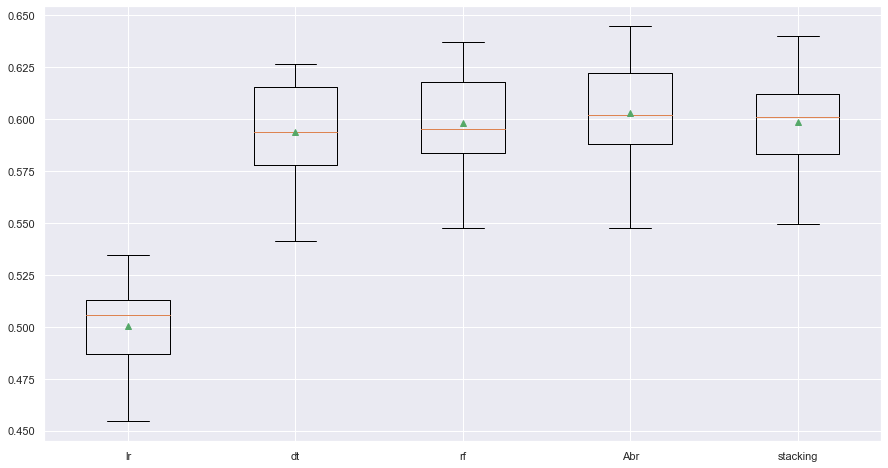

In [63]:
 #plot model performance for comparison
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [64]:
comparison = pd.DataFrame([r2s, mses, rmses, maes],columns=['Linear Regression', 'Decision Tree', 'Random Forest', 'Adaboost Regression', 'Stacking Regression'],index=['R^2','MSE','RMSE','MAE']).T
comparison

,R^2,MSE,RMSE,MAE
Linear Regression,50.0 %,0.8 %,9.2 %,6.9 %
Decision Tree,59.4 %,0.7 %,8.3 %,5.8 %
Random Forest,59.8 %,0.7 %,8.2 %,5.8 %
Adaboost Regression,60.3 %,0.7 %,8.2 %,5.7 %
Stacking Regression,59.8 %,0.7 %,8.3 %,5.8 %


FROM THE VISUALIZATION IT CAN BE CLEARLY SEEN ***ADABOOST REGRESSOR*** GIVES THE BETTER RESULTS THAN THE OTHER ALGORITHMS. AND IN TERMS OF R^2 AND ERROR METRICS ***ADABOOST REGRESSOR*** SEEMS TO HAVE HIGHEST **R^2 = 60.2 %** AND LEAST ERROR METRICS **[MSE = 0.7%, RMSE = 8.1%, MAE = 5.7%]** ON COMPARISON WITH OTHER ALGORITHMS.

***STACKING*** GIVES A GOOD RESULT NEXT TO ADABOOST REGRESSOR HOWEVER THE COEFFICIENCT OF DETERMINATION FOR BOTH REGRESSOR IS QUIET SAME ON COMARISON WHICH COMES AROUND ***59.9 to 60.2 %***